In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)


## 1. studying average height for coffee drinkers and non-coffee drinkers

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

## 2. studying average height for coffee drinkers is less than non-coffee drinkers

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

## 3. Boostrap the sample data, calculate the mean height

In [27]:
noncoff_means, coff_means, diffs = [], [], []

for i in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    noncoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diff = coff_mean - noncoff_mean
    coff_means.append(coff_mean)
    noncoff_means.append(noncoff_mean)
    diffs.append(diff)

In [28]:
np.std(noncoff_means)  # std for the sample distribution

0.40512631277475264

In [29]:
np.std(coff_means)  # std for the sampling of  coff drinkers

0.24073763373473

In [30]:
np.std(diffs)  # std for the standard deviation of the difference

0.4698091074387147

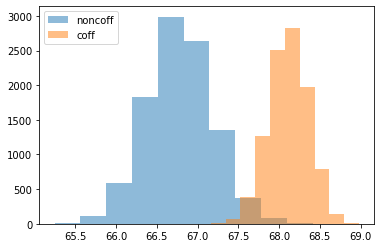

In [31]:
plt.hist(noncoff_means, alpha=0.5)
plt.hist(coff_means, alpha=0.5)
plt.legend(['noncoff', 'coff'])
plt.show()

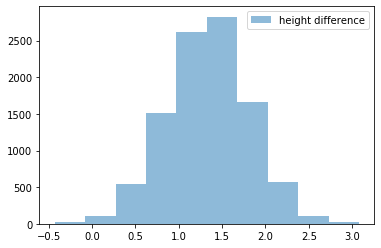

In [32]:
plt.hist(diffs, alpha=0.5)
plt.legend(['height difference'])
plt.show()

## 4. Using the simulation to test it


In [43]:
null_vals = np.random.normal(70, np.std(diffs), 10000)

**use the sample distribution for the difference in the mean to simulate what we will experct if sample distribution were centered on zeros**

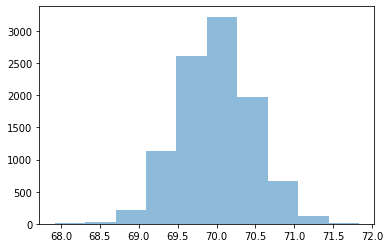

In [44]:
plt.hist(null_vals, alpha=0.5)
plt.show()

In [45]:
np.std(null_vals)

0.46983931733600504

In [46]:
np.std(diffs)

0.4698091074387147

In [51]:
# sample_data = sample_data.height.mean()

In [49]:
sample_data

67.57907352931672

In [50]:
(null_vals > sample_data).mean()

1.0

$$H_0: \mu \geq 70$$


$$H_1: \mu < 70$$

In [53]:
(null_vals < sample_data).mean()   # reject null hypothsis

0.0

$$H_0: \mu = 70$$


$$H_1: \mu \neq 70$$

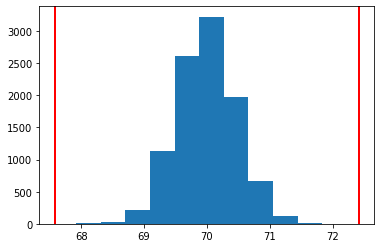

In [55]:
null_mean = np.mean(null_vals)
low = sample_data
high = null_mean + (null_mean - sample_data)

plt.hist(null_vals)
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2)

#### Null hypothesis did not generate the sample statistics, we should reject the null hypothesis. 